In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

sns.set(style = 'darkgrid')

In [22]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [26]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [27]:
df.duplicated().sum()

0

<AxesSubplot:>

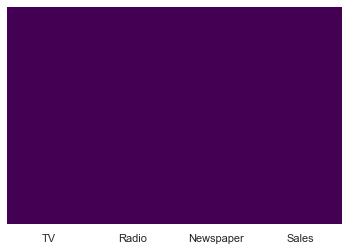

In [28]:
sns.heatmap(df.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

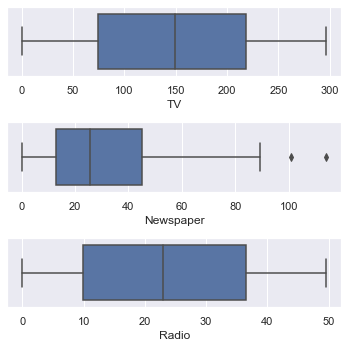

In [29]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [30]:
# Checking outliers

# fig, ax = plt.subplots(3, figsize = (7,15))
# df['TV'].plot.box(ax = ax[0], showmeans = True, meanline = True)
# df['Newspaper'].plot.box(ax = ax[1], showmeans = True, meanline = True)
# df['Radio'].plot.box(ax = ax[2], showmeans = True, meanline = True)


# #sns.boxplot(df['EstimatedSalary'], ax = ax[1])

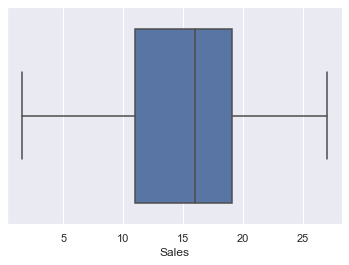

In [31]:
sns.boxplot(df['Sales'])
plt.show()

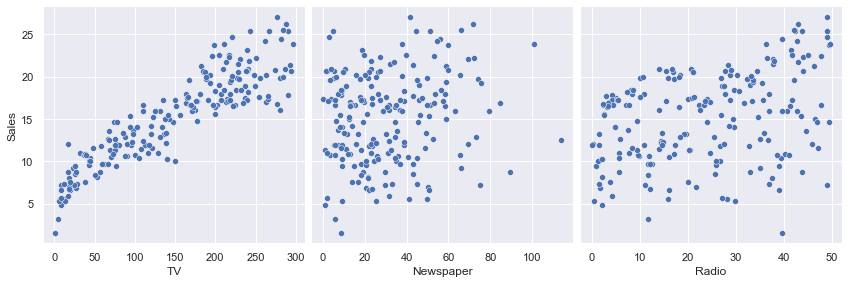

In [32]:
# Let's see how Sales are related with other variables using scatter plot.

sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

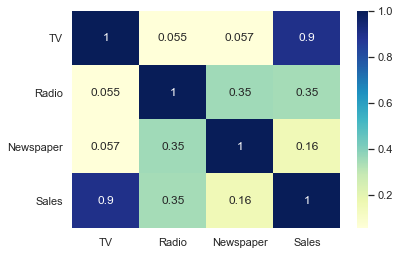

In [33]:
# Let's see the correlation between different variables.

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [34]:
#X = df[['TV','Radio']]
X = df[['TV']]
y = df[['Sales']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [36]:
X_train.head()

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7


In [37]:
y_train.head()

,Sales
169,20.0
97,20.5
31,11.9
12,9.2
35,17.8


In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [39]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['df'])
coeff_df

,df
TV,0.054835


In [40]:
lin_reg.predict([[200]])

array([[18.17353131]])